In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_63307_I')

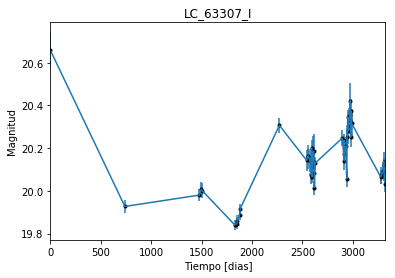

In [2]:
data = np.genfromtxt('LC_63307_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_63307_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

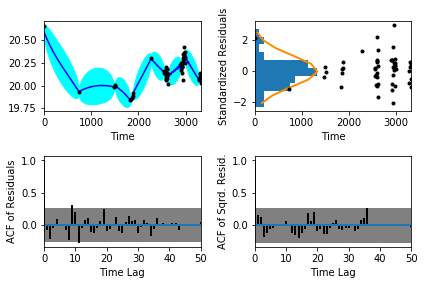

In [5]:
sample.assess_fit()

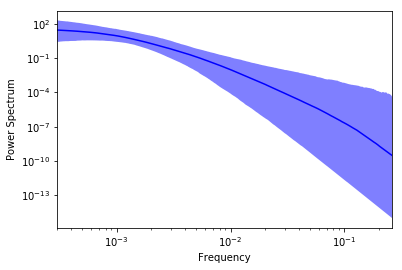

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_63307_I')

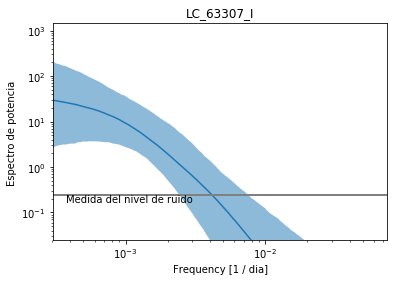

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_63307_I')

Text(0.5,1,'Prediccion , valor esperado LC_63307_I')

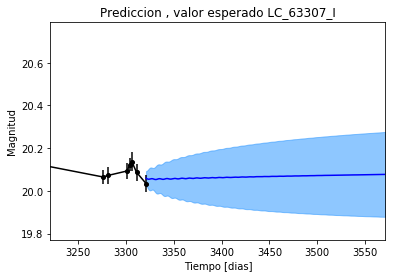

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_63307_I')

Text(0.5,1,'Prediccion, Caminos simulados  LC_63307_I')

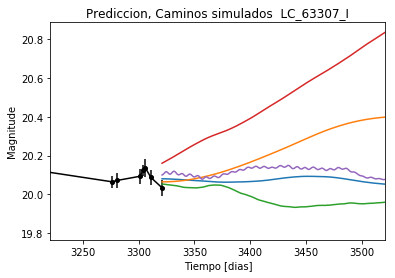

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_63307_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_63307_I')

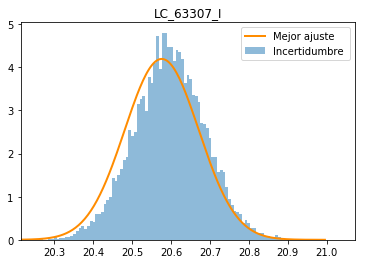

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_63307_I')

Text(0.5,1,'Interpolacion, camino simulado LC_63307_I')

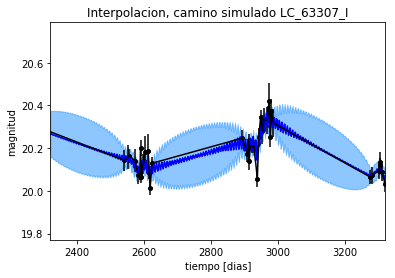

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_63307_I')

Text(0.5,1,'Interpolacion, camino simulado LC_63307_I')

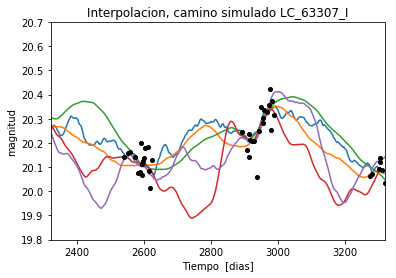

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_63307_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 767.834987272
Median: 0.0094789402868
Standard deviation: 0.0991168768803
68% credibility interval: [ 0.0008597   0.09883549]
95% credibility interval: [  3.55172350e-04   4.03595343e-01]
99% credibility interval: [  3.11672855e-04   4.94299297e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 839.782984277
Median: 0.00188559187376
Standard deviation: 0.0480052775869
68% credibility interval: [ 0.00049593  0.02102747]
95% credibility interval: [ 0.00032508  0.15904474]
99% credibility interval: [  3.06068710e-04   3.49888202e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 382.759313061
Median: 0.00998296092113
Standar

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1428.80757679
Median: 80.6823159019
Standard deviation: 1.57196753818
68% credibility interval: [ 78.92321851  81.85502592]
95% credibility interval: [ 76.56491396  82.56582053]
99% credibility interval: [ 74.79357349  83.00264348]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 396.371766726
Median: 0.408128714956
Standard deviation: 1.12014182692
68% credibility interval: [ 0.04417096  2.0301841 ]
95% credibility interval: [ 0.0135667  3.7673694]
99% credibility interval: [ 0.00967306  5.20088201]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 601.858258168
Median: 0.223141485992
Standard deviation: 2.35480877756
68% credibility interval: [ 0.01232916  2.50483159]
95% credibility interval: [  1.19312771e-03 

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0310431
Median: 2.76783905964e-26
Standard deviation: 1.30482296895e+96
68% credibility interval: [  7.42528954e-85   7.85795380e-06]
95% credibility interval: [  1.44614797e-213   3.90723540e+037]
99% credibility interval: [  2.36325833e-238   9.09321013e+064]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2966.17389733
Median: 20.1482323712
Standard deviation: 0.136643343602
68% credibility interval: [ 20.04345679  20.26494478]
95% credibility interval: [ 19.88952959  20.44266525]
99% credibility interval: [ 19.71181198  20.59817241]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 475.323755672
Median: 0.00940701069645
Standard deviation: 0.128160833648
68% credibility interval: [ 0.          0.20815653]
95% credibility interval: [ 0.          0.44609837]
99% credibility interval: [ 0.          0.50747094]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 475.323755672
Median: 0.00940701069645
Standard deviation: 0.128160833648
68% credibility interval: [ 0.          0.20815653]
95% credibility interval: [ 0.          0.44609837]
99% credibility interval: [ 0.          0.50747094]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 879.059527846
Median: 0.0
Standard deviation: 0.000478520017804
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1428.80757679
Median: 80.6823159019
Standard deviation: 1.57196753818
68% credibility interval: [ 78.92321851  81.85502592]
95% credibility interval: [ 76.56491396  82.56582053]
99% credibility interval: [ 74.79357349  83.00264348]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1892.24578324
Median: 0.0636412326459
Standard deviation: 0.0839275033776
68% credibility interval: [ 0.03635691  0.13147189]
95% credibility interval: [ 0.02196451  0.31870156]
99% credibility interval: [ 0.0162586   0.54554868]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1908.12956508
Median: 1.31554844383
Standard deviation: 0.217974636818
68% credibility interval: [ 1.12059316  1.54678547]
95% credibility interval: [ 0.93578862  1.7995615 ]
99% credibility interval: [ 0.78118689  1.93513471]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 252.590575069
Median: 7.69603817473e-05
Standard deviation: 0.0223665162144
68% credibility interval: [  1.45825742e-06   1.84202440e-03]
95% credibility interval: [  6.78976073e-40   3.02420524e-02]
99% credibility interval: [  5.51675745e-70   1.53113930e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 767.834987272
Median: (-0.0595579383377-0.147116850627j)
Standard deviation: 1.0179798531
68% credibility interval: [-0.62100169+0.j         -0.00540164-0.04251142j]
95% credibility interval: [ -2.53586433e+00+0.j          -2.23161369e-03-0.06171543j]
99% credibility interval: [ -3.10577408e+00+0.j          -1.95829830e-03-0.01795212j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 839.782984277
Median: (-0.0118475231566+0.0614918694291j)
Standard deviation: 0.859894850197
68% credibility interval: [-0.13211951+1.01629748j -0.00311604+0.j        ]
95% credibility interval: [-0.99930758+1.85991031j -0.00204253+0.00312043j]
99% credibility interval: [ -2.19841241e+00+2.14187097j  -1.92308642e-03+0.j        ]
Posterior s